---
### Projectr : 하루시작 지하철 혼잡도 머신러닝 
### Description : 
    
### Author : Forrest Dpark
### Date : 2024.06.04+ ~
### Detail : 
### Update: 
    - 2024.06.04 by pdg : 머신러닝을 위한 데이터 셋 만들기 
        - 함수 수정 
        - 칼럼 순서를 재벼열하는 함수를 만듬. 
    
---

In [1]:
import pandas as pd ,numpy as  np # Data manipulatioin
import seaborn as sns,matplotlib.pyplot as plt # visiulization
import warnings;warnings.filterwarnings('ignore') # 경고 무시 
# 기본 세팅
from Functions import Service 
Service.plotSetting()


___## OS platform 한글 세팅완료 ## ___


In [2]:
# Data loading 
subwayInfo = pd.read_csv("../Data/StationInfo_2022-12-31.csv")
subwayInfo.rename( {'고유역번호(외부역코드)':'역사코드'}, inplace=True, axis=1)
subwayInfo.drop(
    'Unnamed: 0',
    axis=1,
    inplace=True
)
subwayInfo.head()

,역명,역사코드,승하차구분,역_이름코드
0,서울역,150,승차,서울역_150
1,시청,151,승차,시청_151
2,종각,152,승차,종각_152
3,종로3가,153,승차,종로3가_153
4,종로5가,154,승차,종로5가_154


In [3]:
latlng = pd.read_csv("../Data/seoul_subway_latlon_zenzen.csv")
latlng.rename( {'고유역번호(외부역코드)':'역사코드'}, inplace=True, axis=1)
latlng.drop(['역명','승하차구분','역_이름코드'], axis=1,inplace=True)
latlng.head()


,역사코드,latitude,longitude
0,150,37.554679,126.970607
1,151,37.565345,126.977198
2,152,37.570228,126.983151
3,153,37.570421,126.992153
4,154,37.570976,127.001538


In [4]:
test = pd.merge(subwayInfo,latlng, on='역사코드',how='inner' )
test


,역명,역사코드,승하차구분,역_이름코드,latitude,longitude
0,서울역,150,승차,서울역_150,37.554679,126.970607
1,시청,151,승차,시청_151,37.565345,126.977198
2,종각,152,승차,종각_152,37.570228,126.983151
3,종로3가,153,승차,종로3가_153,37.570421,126.992153
4,종로5가,154,승차,종로5가_154,37.570976,127.001538
...,...,...,...,...,...,...
267,단대오거리,2824,승차,단대오거리_2824,37.445022,127.156770
268,신흥,2825,승차,신흥_2825,37.440923,127.147538
269,수진,2826,승차,수진_2826,37.437378,127.140535
270,모란,2827,승차,모란_2827,37.434038,127.129970


In [5]:
# 7호선 배차 시간 데이터
interval = pd.read_csv('../Data/지하철배차시간데이터/interval.csv')
from Functions  import Service

service = Service()
print(Service.dataInfoProcessing(
    df=interval,
    PrintOutColnumber=5
    )
      )
# service.dataInfoProcessing(interval)


1. Data row/colum numbers : 106/22

2. null ceck 결과 Null 없는 clean data!

3. Column  Information (중복체크)
	idx.columName |				 |Colum Info(dtype)|** 
	 ----------------------------------------------------------------
	0.[역사코드(int64)]: 			53/106 [uniq/raw]
	1.[주중주말(object)]: 			2/106 [uniq/raw]
	2.[05(float64)]: 			6/106 [uniq/raw]
	3.[06(float64)]: 			12/106 [uniq/raw]
	4.[07(float64)]: 			14/106 [uniq/raw]
	 ...etc (추가로 17개의 칼럼이 있습니다 )
     역사코드 주중주말   05    06    07    08    09    10    11    12  ...    15  \
0    2711  DAY  3.0   9.0  10.0  12.0  11.0  10.0  10.0  10.0  ...  10.0   
1    2711  SAT  3.0   7.0   7.0   7.0   6.0   8.0   9.0   8.0  ...   6.0   
2    2712  DAY  5.0  15.0  28.0  31.0  29.0  24.0  20.0  20.0  ...  20.0   
3    2712  SAT  5.0  13.0  18.0  19.0  20.0  20.0  20.0  20.0  ...  20.0   
4    2713  DAY  6.0  15.0  27.0  31.0  31.0  24.0  20.0  20.0  ...  20.0   
..    ...  ...  ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
101  2761  SAT  4.0  11.0  11

In [6]:

test_merged_interval= pd.merge(test,interval, on= '역사코드')
test_merged_interval.head()

,역명,역사코드,승하차구분,역_이름코드,latitude,longitude,주중주말,05,06,07,...,15,16,17,18,19,20,21,22,23,24
0,장암,2711,승차,장암_2711,37.699957,127.052818,DAY,3.0,9.0,10.0,...,10.0,9.0,9.0,12.0,10.0,9.0,8.0,4.0,6.0,0.0
1,장암,2711,승차,장암_2711,37.699957,127.052818,SAT,3.0,7.0,7.0,...,6.0,7.0,8.0,9.0,7.0,7.0,8.0,7.0,7.0,0.0
2,도봉산,2712,승차,도봉산_2712,37.689512,127.046063,DAY,5.0,15.0,28.0,...,20.0,20.0,25.0,29.0,26.0,24.0,20.0,16.0,12.0,2.0
3,도봉산,2712,승차,도봉산_2712,37.689512,127.046063,SAT,5.0,13.0,18.0,...,20.0,20.0,20.0,20.0,20.0,20.0,18.0,16.0,10.0,2.0
4,수락산,2713,승차,수락산_2713,37.677881,127.055351,DAY,6.0,15.0,27.0,...,20.0,20.0,24.0,28.0,28.0,24.0,18.0,17.0,13.0,1.0


In [7]:
## 주중 주말  카테고리를 0,1 로 바꾸어줌 주말일경우 1 주중일경우 0  ->onehot encoding 
test_mi = test_merged_interval.copy()
test_mi.rename({'주중주말':'주말'}, axis=1,inplace=True)
test_mi_week_dummies = pd.get_dummies(test_mi['주말'])


test_mi_week_dummies.head()
test_ = pd.concat([test_mi,test_mi_week_dummies], axis=1)
# 주말 칼럼 삭제 , day -> 주중, sat -> 주말 로 변경 
test_.drop('주말', axis=1, inplace=True)
# for idx, col in enumerate(list(test_.columns)):
#     print(idx, col)
# 인덱스 2의 값을 인덱스 4로 이동

test_ =Service.reorder_columns(test_,'SAT',4)
test_ =Service.reorder_columns(test_,'DAY',5)




In [8]:
test_.head()

,역명,역사코드,승하차구분,역_이름코드,SAT,DAY,latitude,longitude,05,06,...,15,16,17,18,19,20,21,22,23,24
0,장암,2711,승차,장암_2711,False,True,37.699957,127.052818,3.0,9.0,...,10.0,9.0,9.0,12.0,10.0,9.0,8.0,4.0,6.0,0.0
1,장암,2711,승차,장암_2711,True,False,37.699957,127.052818,3.0,7.0,...,6.0,7.0,8.0,9.0,7.0,7.0,8.0,7.0,7.0,0.0
2,도봉산,2712,승차,도봉산_2712,False,True,37.689512,127.046063,5.0,15.0,...,20.0,20.0,25.0,29.0,26.0,24.0,20.0,16.0,12.0,2.0
3,도봉산,2712,승차,도봉산_2712,True,False,37.689512,127.046063,5.0,13.0,...,20.0,20.0,20.0,20.0,20.0,20.0,18.0,16.0,10.0,2.0
4,수락산,2713,승차,수락산_2713,False,True,37.677881,127.055351,6.0,15.0,...,20.0,20.0,24.0,28.0,28.0,24.0,18.0,17.0,13.0,1.0


12.0


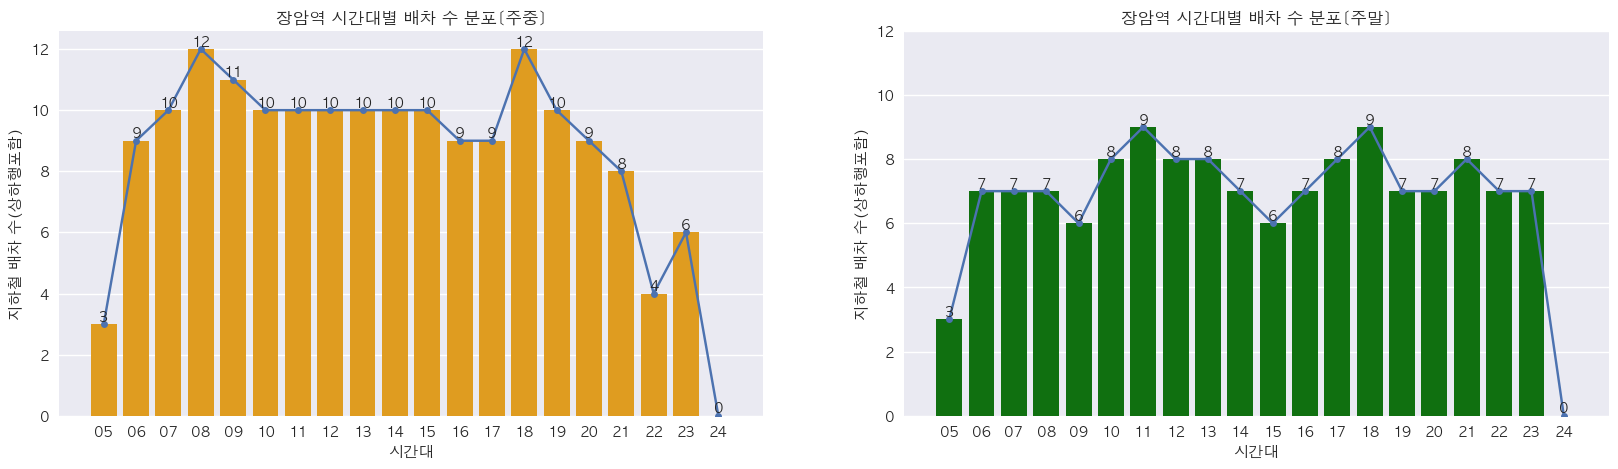

In [9]:
def stationDispatchBarplot(df,row,title_colNum):
    # fig =plt.figure(figsize=(20,5))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    bar1 = sns.barplot(
        data=df.iloc[row,8:],
        color='orange',
        ax= ax1
    )
    ax1.set_title(f"{df[title_colNum].iloc[row]}역 시간대별 배차 수 분포[{'주중' if df['DAY'].iloc[row] ==True else '주말'}]")
    ax1.set_ylabel("지하철 배차 수(상하행포함)")
    bar1.bar_label(bar1.containers[0])
    ax1.set_xlabel("시간대")
    
    
    bar2 = sns.barplot(
        data=df.iloc[row+1,8:],
        color='green',
        ax= ax2,
        
    )
    bar2.bar_label(bar2.containers[0])
    
    ax2.set_title(f"{df[title_colNum].iloc[row+1]}역 시간대별 배차 수 분포[{'주중' if df['DAY'].iloc[row+1] ==True else '주말'}]")
    ax2.set_ylabel("지하철 배차 수(상하행포함)")
    maxlim=(max((df.iloc[row,8:]).to_numpy()))
    print(maxlim)
    ax2.set_ylim([0,maxlim])
    # bar2.set_ylim =[0,maxlim]
    ax2.set_xlabel("시간대")
    
    ax1.plot(df.iloc[row+0,8:].index,df.iloc[row+0,8:],
        marker= "o",
        markersize = 5,
        
        )
    ax2.plot(df.iloc[row+1,8:].index,df.iloc[row+1,8:],
        marker= "o",
        markersize = 5
        )
    
    
    plt.show()
for i in range(0,len(test_[:2]),2):

    stationDispatchBarplot(test_,i, title_colNum='역명')

> 주중에는 출퇴근 시간인 7시부터 9시까지, 6시부터 8시 까지 배차수가 많다. 11시부터 5시까지는 20대로 일정.       
> 7시 전에는 배차수가 줄어든다.     
> 지하철 배차 분포를 분석하기위해 각 시간대별 배차수 평균과 standard deviation 같은 통계치를 넣은 그래프를 넣고싶다. error bar  

---
#### 전체 학습데이터 생성
- 서울교통공사 역별 일별 시간대별 승하차 인원 정보 2022도 데이터 와 지하철 역정보 테이블을 merge



In [10]:
# Data loading 
subway = pd.read_csv("../Data/교통공사데이터/서울교통공사_역별 일별 시간대별 승하차인원 정보_20221231.csv", encoding='euc-kr')
subway.head()

,연번,수송일자,호선,고유역번호(외부역코드),역명,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후
0,1,2022-01-01,1,150,서울역,승차,120,137,211,439,...,1566,1686,1591,1358,1062,899,1327,814,234,NaN
1,2,2022-01-01,1,150,서울역,하차,113,560,617,910,...,1329,1251,1126,884,764,654,728,416,131,NaN
2,3,2022-01-01,1,151,시청,승차,38,66,101,139,...,474,550,672,528,420,434,491,232,38,NaN
3,4,2022-01-01,1,151,시청,하차,31,195,224,380,...,408,377,354,213,131,98,137,61,24,NaN
4,5,2022-01-01,1,152,종각,승차,44,71,86,158,...,889,964,1024,803,855,1099,1209,255,62,NaN


In [11]:
subway_test= Service.dataInfoProcessing(subway,replace_Nan=True,PrintOutColnumber=10)
mlTable = subway_test
mlTable.head()


1. Data row/colum numbers : 199080/26

2. null ceck 결과 총 82346개의 null 이 있습니다!
   => 25번째.[24시이후]컬럼 :  null 82346 개,	 not null 116734 개

3. Column  Information (중복체크)
	idx.columName |				 |Colum Info(dtype)|** 
	 ----------------------------------------------------------------
	0.[연번(int64)]: 			199080/199080 [uniq/raw]
	1.[수송일자(object)]: 			365/199080 [uniq/raw]
	2.[호선(int64)]: 			8/199080 [uniq/raw]
	3.[고유역번호(외부역코드)(object)]: 		558/199080 [uniq/raw]
	4.[역명(object)]: 			244/199080 [uniq/raw]
	5.[승하차구분(object)]: 			2/199080 [uniq/raw]
	6.[06시이전(int64)]: 			1596/199080 [uniq/raw]
	7.[06-07시간대(int64)]: 		2515/199080 [uniq/raw]
	8.[07-08시간대(int64)]: 		6520/199080 [uniq/raw]
	9.[08-09시간대(int64)]: 		10884/199080 [uniq/raw]
	 ...etc (추가로 16개의 칼럼이 있습니다 )


,연번,수송일자,호선,고유역번호(외부역코드),역명,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후
0,1,2022-01-01,1,150,서울역,승차,120,137,211,439,...,1566,1686,1591,1358,1062,899,1327,814,234,0.0
1,2,2022-01-01,1,150,서울역,하차,113,560,617,910,...,1329,1251,1126,884,764,654,728,416,131,0.0
2,3,2022-01-01,1,151,시청,승차,38,66,101,139,...,474,550,672,528,420,434,491,232,38,0.0
3,4,2022-01-01,1,151,시청,하차,31,195,224,380,...,408,377,354,213,131,98,137,61,24,0.0
4,5,2022-01-01,1,152,종각,승차,44,71,86,158,...,889,964,1024,803,855,1099,1209,255,62,0.0


--- 
### 칼럼 이름 정제 

In [12]:
# mlTable.columns
mlTable.rename({
    "고유역번호(외부역코드)":"역사코드",
    '06시이전':'05',
    '06-07시간대':'06',
    '07-08시간대':'07',
    '08-09시간대':'08',
    '09-10시간대':'09',
    '10-11시간대':'10',
    '11-12시간대':'11',
    '12-13시간대':'12',
    '13-14시간대':'13',
    '14-15시간대':'14',
    '15-16시간대':'15',
    '16-17시간대':'16',
    '17-18시간대':'17',
    '18-19시간대':'18',
    '19-20시간대':'19',
    '20-21시간대':'20',
    '21-22시간대':'21',
    '22-23시간대':'22',
    '23-24시간대':'23',
    '24시이후':'24', 
    },inplace =True, axis = 1)



---
#### 수송일자를 기준으로 날짜 변수 feature 화 

In [13]:

mlTable= Service.dayToIntConvert(mlTable, "수송일자")
mlTable = Service.reorder_columns(mlTable,col_name="요일",target_idx=4)
# mlTable.drop('연번', inplace=True, axis=1)
mlTable.head()

,연번,수송일자,호선,역사코드,요일,역명,승하차구분,05,06,07,...,15,16,17,18,19,20,21,22,23,24
0,1,2022-01-01,1,150,6,서울역,승차,120,137,211,...,1566,1686,1591,1358,1062,899,1327,814,234,0.0
1,2,2022-01-01,1,150,6,서울역,하차,113,560,617,...,1329,1251,1126,884,764,654,728,416,131,0.0
2,3,2022-01-01,1,151,6,시청,승차,38,66,101,...,474,550,672,528,420,434,491,232,38,0.0
3,4,2022-01-01,1,151,6,시청,하차,31,195,224,...,408,377,354,213,131,98,137,61,24,0.0
4,5,2022-01-01,1,152,6,종각,승차,44,71,86,...,889,964,1024,803,855,1099,1209,255,62,0.0


In [14]:
mlTable= Service.date_Divid_Add_YMW_cols(mlTable,'수송일자')
mlTable.head()

,연번,수송일자,호선,역사코드,요일,역명,승하차구분,05,06,07,...,18,19,20,21,22,23,24,년도,월,주차
0,1,2022-01-01,1,150,6,서울역,승차,120,137,211,...,1358,1062,899,1327,814,234,0.0,2021,1,52
1,2,2022-01-01,1,150,6,서울역,하차,113,560,617,...,884,764,654,728,416,131,0.0,2021,1,52
2,3,2022-01-01,1,151,6,시청,승차,38,66,101,...,528,420,434,491,232,38,0.0,2021,1,52
3,4,2022-01-01,1,151,6,시청,하차,31,195,224,...,213,131,98,137,61,24,0.0,2021,1,52
4,5,2022-01-01,1,152,6,종각,승차,44,71,86,...,803,855,1099,1209,255,62,0.0,2021,1,52


In [18]:

def holidaysToIntConvert(df,DateColName):
    # !pip install holidays
    import holidays
    kr_holidays = holidays.KR()
    df['공휴일'] = df[DateColName].apply(lambda x: 0 if x in kr_holidays else 1)
    return df
mlTable= holidaysToIntConvert(mlTable,DateColName='수송일자')
mlTable.head()

,연번,수송일자,호선,역사코드,요일,역명,승하차구분,05,06,07,...,19,20,21,22,23,24,년도,월,주차,공휴일
0,1,2022-01-01,1,150,6,서울역,승차,120,137,211,...,1062,899,1327,814,234,0.0,2021,1,52,0
1,2,2022-01-01,1,150,6,서울역,하차,113,560,617,...,764,654,728,416,131,0.0,2021,1,52,0
2,3,2022-01-01,1,151,6,시청,승차,38,66,101,...,420,434,491,232,38,0.0,2021,1,52,0
3,4,2022-01-01,1,151,6,시청,하차,31,195,224,...,131,98,137,61,24,0.0,2021,1,52,0
4,5,2022-01-01,1,152,6,종각,승차,44,71,86,...,855,1099,1209,255,62,0.0,2021,1,52,0


In [16]:

mlTable_승차 = mlTable[mlTable['승하차구분']=='승차']
mlTable_하차 = mlTable[mlTable['승하차구분']=='하차']
mlTable_승차.head()

,연번,수송일자,호선,역사코드,요일,역명,승하차구분,05,06,07,...,18,19,20,21,22,23,24,년도,월,주차
0,1,2022-01-01,1,150,6,서울역,승차,120,137,211,...,1358,1062,899,1327,814,234,0.0,2021,1,52
2,3,2022-01-01,1,151,6,시청,승차,38,66,101,...,528,420,434,491,232,38,0.0,2021,1,52
4,5,2022-01-01,1,152,6,종각,승차,44,71,86,...,803,855,1099,1209,255,62,0.0,2021,1,52
6,7,2022-01-01,1,153,6,종로3가,승차,74,73,67,...,861,705,871,1160,324,69,0.0,2021,1,52
8,9,2022-01-01,1,154,6,종로5가,승차,37,55,74,...,620,510,479,477,107,22,0.0,2021,1,52
